In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from MotionDataset import MotionData
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("cuda")
else:
    device = torch.device('cpu')
    print("CPU")

cuda


In [3]:
train_labels = "./data/labels/train.csv"
val_labels = "./data/labels/val.csv"
val_dir = train_dir = "./data/"

train_dataset = MotionData(train_labels, train_dir)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = MotionData(val_labels, val_dir)
val_loader = DataLoader(val_dataset, batch_size=16)

In [18]:
# model parameters
input_size = 6
# classifying up:0, down:1, left:2, right:3
num_classes = 4
num_epochs = 40
model = nn.Sequential(
        nn.Conv1d(6, 32, 3),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Dropout(p=0.4),
        nn.Flatten(start_dim=1),
        nn.Linear(7968, num_classes),
).to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adagrad(model.parameters(), lr=1e-3)

Epoch 1, train loss: 1.313, train acc: 28.788%, val loss: 0.9777, val acc: 62.000%
Epoch 2, train loss: 1.136, train acc: 65.657%, val loss: 1.43, val acc: 56.000%
Epoch 3, train loss: 1.043, train acc: 70.707%, val loss: 1.227, val acc: 44.000%
Epoch 4, train loss: 0.9997, train acc: 67.172%, val loss: 0.8885, val acc: 84.000%
Epoch 5, train loss: 0.9015, train acc: 81.313%, val loss: 0.8758, val acc: 84.000%
Epoch 6, train loss: 0.8557, train acc: 79.293%, val loss: 1.014, val acc: 78.000%
Epoch 7, train loss: 0.8201, train acc: 80.808%, val loss: 1.152, val acc: 76.000%
Epoch 8, train loss: 0.7954, train acc: 83.838%, val loss: 1.008, val acc: 68.000%
Epoch 9, train loss: 0.7538, train acc: 83.333%, val loss: 0.8685, val acc: 70.000%
Epoch 10, train loss: 0.698, train acc: 84.343%, val loss: 0.6587, val acc: 84.000%
Epoch 11, train loss: 0.6874, train acc: 85.354%, val loss: 0.9365, val acc: 82.000%
Epoch 12, train loss: 0.6444, train acc: 85.859%, val loss: 0.8306, val acc: 84.000%

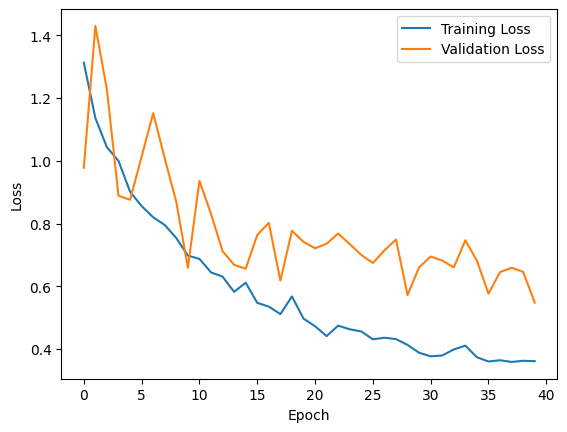

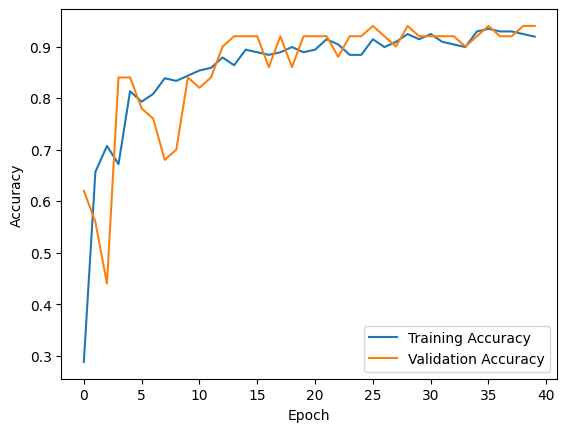

In [19]:
losses = []
train_losses = []
val_losses = []
train_accs = []
val_accs = []
for x in range(num_epochs):
    model.train()
    running_loss = 0
    train_correct = train_total = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        yhat = model(X.permute(0,2,1)) # change tensor shape so sensor data are the channels
        _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
        train_total += y.size(0)
        loss = criterion(yhat, y)
        running_loss += loss.item()
        train_correct += (pred == y).sum().item()
        optim.zero_grad()
        loss.backward()
        optim.step()
    losses.append(running_loss / len(train_loader))

    model.eval()
    with torch.no_grad():
        val_correct = val_total = 0
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            yhat = model(X.permute(0,2,1))
            _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
            val_total += y.size(0)
            val_loss = criterion(yhat, y)
            val_correct += (pred == y).sum().item()
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss.item())
    print(f"Epoch {x+1}, train loss: {train_loss:.4}, train acc: {train_acc:.3%}, val loss: {val_loss.item():.4}, val acc: {val_acc:.3%}")

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1, train loss: 1.444, train acc: 41.919%, val loss: 1.744, val acc: 44.000%
Epoch 2, train loss: 1.063, train acc: 68.182%, val loss: 0.3752, val acc: 36.000%
Epoch 3, train loss: 0.9274, train acc: 66.162%, val loss: 0.9791, val acc: 56.000%
Epoch 4, train loss: 0.8161, train acc: 74.242%, val loss: 1.375, val acc: 70.000%
Epoch 5, train loss: 0.7126, train acc: 84.848%, val loss: 0.9614, val acc: 78.000%
Epoch 6, train loss: 0.7078, train acc: 86.364%, val loss: 1.297, val acc: 74.000%
Epoch 7, train loss: 0.6205, train acc: 84.343%, val loss: 1.273, val acc: 74.000%
Epoch 8, train loss: 0.6099, train acc: 84.343%, val loss: 0.5693, val acc: 84.000%
Epoch 9, train loss: 0.5312, train acc: 91.414%, val loss: 0.8906, val acc: 88.000%
Epoch 10, train loss: 0.4935, train acc: 91.414%, val loss: 1.147, val acc: 86.000%
Epoch 11, train loss: 0.491, train acc: 89.899%, val loss: 1.224, val acc: 80.000%
Epoch 12, train loss: 0.4532, train acc: 91.919%, val loss: 0.6833, val acc: 94.000

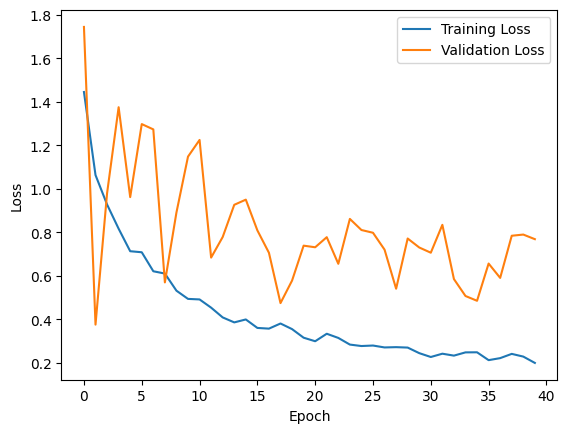

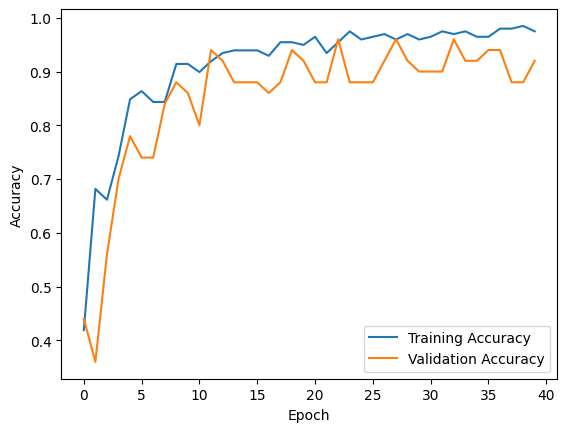

In [21]:
num_epochs = 40
model = nn.Sequential(
        nn.Conv1d(6, 64, 3),
        nn.ReLU(),
        nn.MaxPool1d(kernel_size=2),
        nn.Dropout(p=0.4),
        nn.Flatten(start_dim=1),
        nn.Linear(15936, num_classes),
).to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adagrad(model.parameters(), lr=1e-3)

losses = []
train_losses = []
val_losses = []
train_accs = []
val_accs = []
for x in range(num_epochs):
    model.train()
    running_loss = 0
    train_correct = train_total = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        yhat = model(X.permute(0,2,1)) # change tensor shape so sensor data are the channels
        _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
        train_total += y.size(0)
        loss = criterion(yhat, y)
        running_loss += loss.item()
        train_correct += (pred == y).sum().item()
        optim.zero_grad()
        loss.backward()
        optim.step()
    losses.append(running_loss / len(train_loader))

    model.eval()
    with torch.no_grad():
        val_correct = val_total = 0
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            yhat = model(X.permute(0,2,1))
            _, pred = torch.max(nn.functional.softmax(yhat.data, dim=1), 1)
            val_total += y.size(0)
            val_loss = criterion(yhat, y)
            val_correct += (pred == y).sum().item()
    train_acc = train_correct / train_total
    val_acc = val_correct / val_total
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss.item())
    print(f"Epoch {x+1}, train loss: {train_loss:.4}, train acc: {train_acc:.3%}, val loss: {val_loss.item():.4}, val acc: {val_acc:.3%}")

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()